In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from scipy.stats import zscore
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('40192_2013_16_MOESM1_ESM.csv',force_remount=True)

Mounted at 40192_2013_16_MOESM1_ESM.csv


In [ ]:
df=pd.read_csv('/content/40192_2013_16_MOESM1_ESM.csv/MyDrive/Machine Learning/40192_2013_16_MOESM1_ESM.csv')

In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,Tt,TCr,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.21,0.44,0.017,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.25,0.18,0.44,0.009,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.27,0.43,0.008,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.23,0.51,0.018,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.22,0.19,0.42,0.026,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


* Conduct EDA and summarize your observations. 

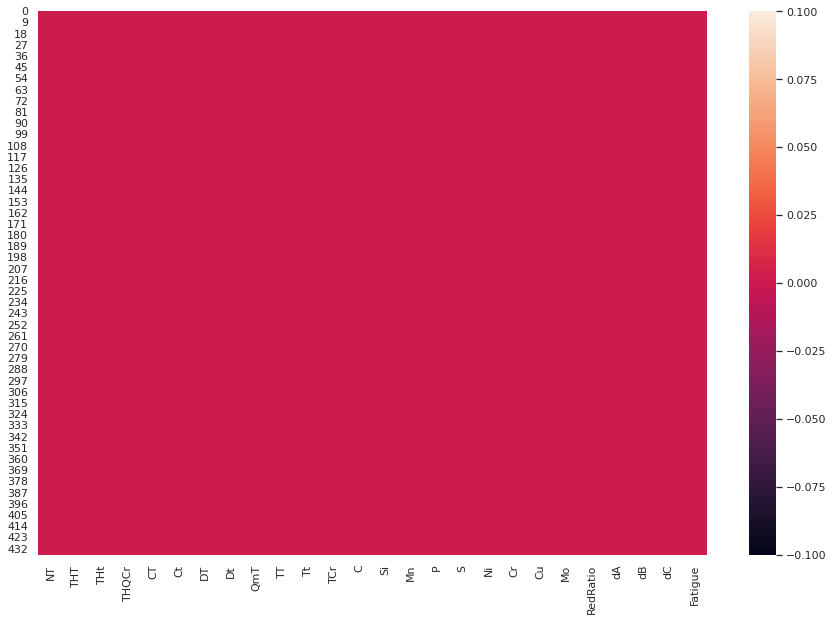

In [ ]:
df.drop('Sl. No.',axis=1, inplace=True)
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,Tt,TCr,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,536.842105,65.080092,20.814645,0.388398,0.299588,0.823021,0.015785,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,164.101963,21.477650,8.072207,0.096364,0.246045,0.279028,0.005205,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,30.000000,0.000000,0.000000,0.170000,0.160000,0.370000,0.002000,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,550.000000,60.000000,24.000000,0.340000,0.240000,0.700000,0.012000,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,600.000000,60.000000,24.000000,0.400000,0.260000,0.760000,0.016000,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,650.000000,60.000000,24.000000,0.430000,0.290000,0.800000,0.019000,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,680.000000,120.000000,24.000000,0.630000,2.050000,1.600000,0.031000,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

### We see that there is no null input data

In [ ]:
# function to identify optimum number of clusters
def optimize_k_means(data,max_k):
  means=[]
  inertias=[]

  for k in range(1,max_k):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

    # elbow plot
  fig=plt.subplots(figsize=(10,5))
  plt.plot(means,inertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()

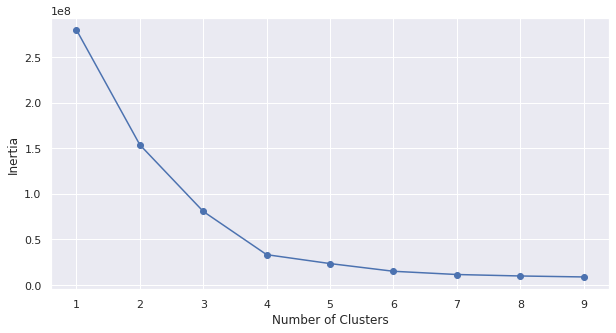

In [ ]:
optimize_k_means(df,10)

### we set the number of clusters to 3

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42)

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df['kmeans_3']=kmeans.labels_
df

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,Tt,TCr,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue,kmeans_3
0,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,0.26,0.21,0.44,0.017,0.022,0.01,0.02,0.01,0.00,825,0.070,0.020,0.040,232,1
1,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,0.25,0.18,0.44,0.009,0.017,0.08,0.12,0.08,0.00,610,0.110,0.000,0.040,235,1
2,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,0.26,0.27,0.43,0.008,0.015,0.02,0.03,0.01,0.00,1270,0.070,0.020,0.000,235,0
3,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,0.26,0.23,0.51,0.018,0.024,0.01,0.02,0.01,0.00,1740,0.060,0.000,0.000,241,0
4,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,0.22,0.19,0.42,0.026,0.022,0.01,0.02,0.02,0.00,825,0.040,0.020,0.000,225,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,930,30,0,0,930,340.2,895.812,70.2,140,160,120,0.5,0.21,0.26,0.65,0.015,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1030,2
433,930,30,0,0,930,340.2,895.812,70.2,140,160,120,0.5,0.18,0.25,0.79,0.016,0.015,0.07,1.08,0.08,0.15,530,0.017,0.004,0.008,957,2
434,930,30,0,0,930,340.2,895.812,70.2,60,200,120,0.5,0.21,0.31,0.81,0.012,0.019,0.06,1.17,0.07,0.17,690,0.080,0.000,0.000,1104,2
435,930,30,0,0,930,340.2,895.812,70.2,60,200,120,0.5,0.21,0.26,0.65,0.015,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1008,2


(0.0, 2000.0)

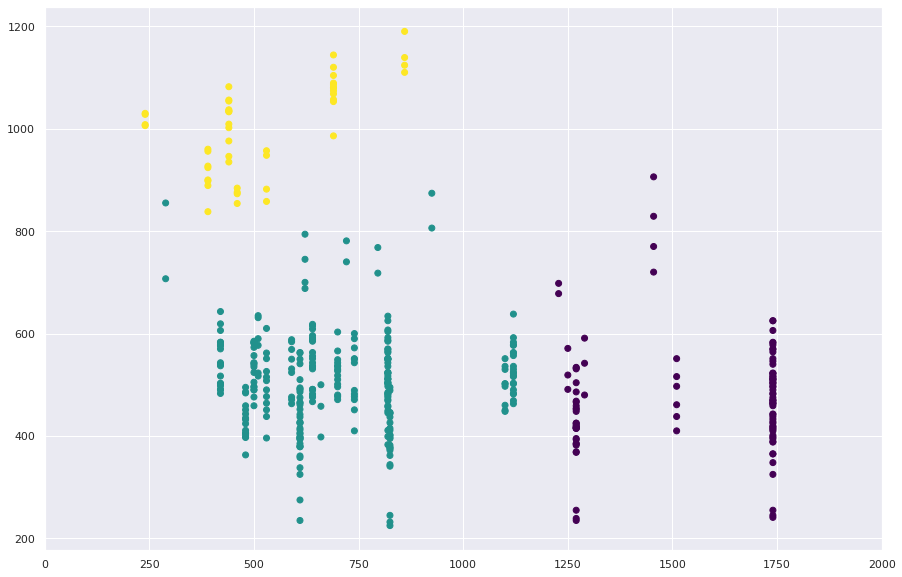

In [ ]:
plt.scatter(x=df['RedRatio'],y=df['Fatigue'],c=df['kmeans_3'],cmap='viridis')
plt.xlim([0,2000])

In [ ]:
df.drop('kmeans_3',axis=1,inplace=True)

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  # Remove the CWD from sys.path while we load stuff.


,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,Tt,TCr,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
NT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
THT,-0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
THt,-0.74,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
THQCr,-0.75,0.53,0.54,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CT,0.77,-0.89,-0.89,-0.48,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ct,0.70,-0.81,-0.81,-0.43,0.91,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DT,0.77,-0.89,-0.89,-0.48,1.00,0.91,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Dt,0.68,-0.78,-0.78,-0.42,0.88,0.83,0.89,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
QmT,0.62,-0.72,-0.72,-0.39,0.81,0.83,0.81,0.75,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TT,-0.64,0.95,0.95,0.51,-0.79,-0.71,-0.79,-0.69,-0.64,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
X=df.drop(['Fatigue'],axis=1)
columns=X.columns
y=df['Fatigue']
X_int, X_test, y_int, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scoring Functions
def MAE(y_true, y_pred):
  return (1/len(y_true)) * np.sum(np.abs((y_true-y_pred)))

def MAEf(y_true, y_pred):
  return (1/len(y_true)) * np.sum(np.abs((y_true-y_pred) / y_true))

def RMSE(y_true, y_pred):
  return np.sqrt(  (1/len(y_true)) * np.sum( ((y_true-y_pred))**2)  )

def RMSEf(y_true, y_pred):
  return np.sqrt(  (1/len(y_true)) * np.sum( ((y_true-y_pred) / y_true)**2)  )

def SDE(y_true, y_pred):
  e = (1/len(y_true)) * np.sum(np.abs((y_true-y_pred)))
  return np.sqrt(  (1/len(y_true)) * np.sum( np.abs(((y_true-y_pred)) - e)**2  ) )

def SDEf(y_true, y_pred):
  ef = (1/len(y_true)) * np.sum(np.abs((y_true-y_pred) / y_true))
  return np.sqrt(  (1/len(y_true)) * np.sum( np.abs(((y_true-y_pred) / y_true) - ef)**2  ) )

def R2(y_true, y_pred):
  n = np.sum( (y_true-np.mean(y_true) ) * (y_pred-np.mean(y_pred)) )
  d = np.sqrt(  np.sum( (y_true-np.mean(y_true))**2 ) * np.sum( (y_pred-np.mean(y_pred))**2 )   )
  if d != 0:
    return (float(n)/float(d))**2
  else: 
    return 0 

scoring_metrics = {'R2': make_scorer(R2,greater_is_better=True),
                  'MAEf': make_scorer(MAEf,greater_is_better=True),
                  'RMSEf': make_scorer(RMSEf,greater_is_better=True),
                  'SDEf': make_scorer(SDEf,greater_is_better=True),
                  'MAE': make_scorer(MAE,greater_is_better=True),
                  'RMSE': make_scorer(RMSE,greater_is_better=True),
                  'SDE': make_scorer(SDE,greater_is_better=True),
                 }


In [ ]:
skf=6
def avr_cross_val(estim,X,y,scoring=scoring_metrics,cv=skf):
  score=cross_validate(estim,X,y,scoring=scoring_metrics,cv=skf)
  return {metric: round(np.mean(scores), 5) for metric, scores in score.items()}


In [ ]:
lin_reg=LinearRegression()
linreg_cross=avr_cross_val(lin_reg,X_int,y_int,scoring=scoring_metrics)

In [ ]:
linreg_cross

{'fit_time': 0.00945,
 'score_time': 0.01324,
 'test_MAE': 25.41701,
 'test_MAEf': 0.04392,
 'test_R2': 0.9613,
 'test_RMSE': 36.33972,
 'test_RMSEf': 0.0564,
 'test_SDE': 44.12464,
 'test_SDEf': 0.0725}

In [ ]:
linreg_pred=cross_val_predict(lin_reg,X_test,y_test)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn_cross=avr_cross_val(knn,X_int,y_int,scoring=scoring_metrics,cv=6)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,


In [ ]:
knn_cross

{'fit_time': 0.00538,
 'score_time': 0.01962,
 'test_MAE': 46.31151,
 'test_MAEf': 0.08027,
 'test_R2': 0.87996,
 'test_RMSE': 69.69427,
 'test_RMSEf': 0.11222,
 'test_SDE': 65.04012,
 'test_SDEf': 0.10739}

In [ ]:
knn_pred=cross_val_predict(knn,X_test,y_test,cv=2)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


In [ ]:
rig=Ridge()
rig_cross=avr_cross_val(rig,X_int,y_int,scoring=scoring_metrics)

In [ ]:
rig_cross

{'fit_time': 0.00725,
 'score_time': 0.0117,
 'test_MAE': 26.27095,
 'test_MAEf': 0.04384,
 'test_R2': 0.95471,
 'test_RMSE': 39.82694,
 'test_RMSEf': 0.05761,
 'test_SDE': 47.4874,
 'test_SDEf': 0.07369}

In [ ]:
rig_pred=cross_val_predict(rig,X_test,y_test)

In [ ]:
ann_dp_wd=tf.keras.models.Sequential()
ann_dp_wd.add(tf.keras.layers.Dense(units=150,input_dim=25,kernel_initializer="normal",activation="relu"))
ann_dp_wd.add(tf.keras.layers.Dense(units=150,kernel_initializer="normal",activation="relu"))
ann_dp_wd.add(tf.keras.layers.Dense(units=150,kernel_initializer="normal",activation="relu"))
ann_dp_wd.add(tf.keras.layers.Dense(units=150,kernel_initializer="normal",activation="relu"))
ann_dp_wd.add(tf.keras.layers.Dense(units=1,kernel_initializer="normal",activation="linear"))
ann_dp_wd.compile(optimizer="adam",loss="mean_squared_error")
fit_dp_wd=ann_dp_wd.fit(X_int.values,y_int.values,batch_size=15,epochs=150)

Epoch 1/150
24/24 [==============================] - 1s 5ms/step - loss: 151027.4844
Epoch 2/150
24/24 [==============================] - 0s 10ms/step - loss: 18042.6953
Epoch 3/150
24/24 [==============================] - 0s 7ms/step - loss: 10175.7705
Epoch 4/150
24/24 [==============================] - 0s 10ms/step - loss: 9845.3398
Epoch 5/150
24/24 [==============================] - 0s 9ms/step - loss: 10008.6465
Epoch 6/150
24/24 [==============================] - 0s 9ms/step - loss: 8887.0674
Epoch 7/150
24/24 [==============================] - 0s 8ms/step - loss: 9673.6143
Epoch 8/150
24/24 [==============================] - 0s 7ms/step - loss: 8648.5742
Epoch 9/150
24/24 [==============================] - 0s 7ms/step - loss: 8899.7305
Epoch 10/150
24/24 [==============================] - 0s 6ms/step - loss: 8315.0391
Epoch 11/150
24/24 [==============================] - 0s 6ms/step - loss: 8495.6191
Epoch 12/150
24/24 [==============================] - 0s 6ms/step - loss: 8093

In [ ]:
ann_pred = np.reshape(ann_dp_wd.predict(X_test),y_test.shape)

In [ ]:
print('RMSE=',np.sqrt(mean_squared_error(y_test,ann_pred)))
print('MAE=',mean_absolute_error(y_test,ann_pred))
print('R2=',r2_score(y_test,ann_pred))
print('MAEf=',(1/len(y_test)) * np.sum(np.abs((y_test-ann_pred) / y_test)))
print('RMSEf',np.sqrt(  (1/len(y_test)) * np.sum( ((y_test-ann_pred) / y_test)**2)))
print('SDE=',np.sqrt(  (1/len(y_test)) * np.sum( np.abs(((y_test-ann_pred)) - (1/len(y_test)) * np.sum(np.abs((y_test-ann_pred))))**2  ) ))
print('SDEf=',np.sqrt(  (1/len(y_test)) * np.sum( np.abs(((y_test-ann_pred) / y_test) - (1/len(y_test)) * np.sum(np.abs((y_test-ann_pred) / y_test)))**2  ) ))

RMSE= 63.89972161239185
MAE= 48.836008765480734
R2= 0.9012403681442863
MAEf= 0.08565028447142269
RMSEf 0.10335176617772716
SDE= 56.990056280834004
SDEf= 0.10045267375094552


Text(0.5, 0, 'True')

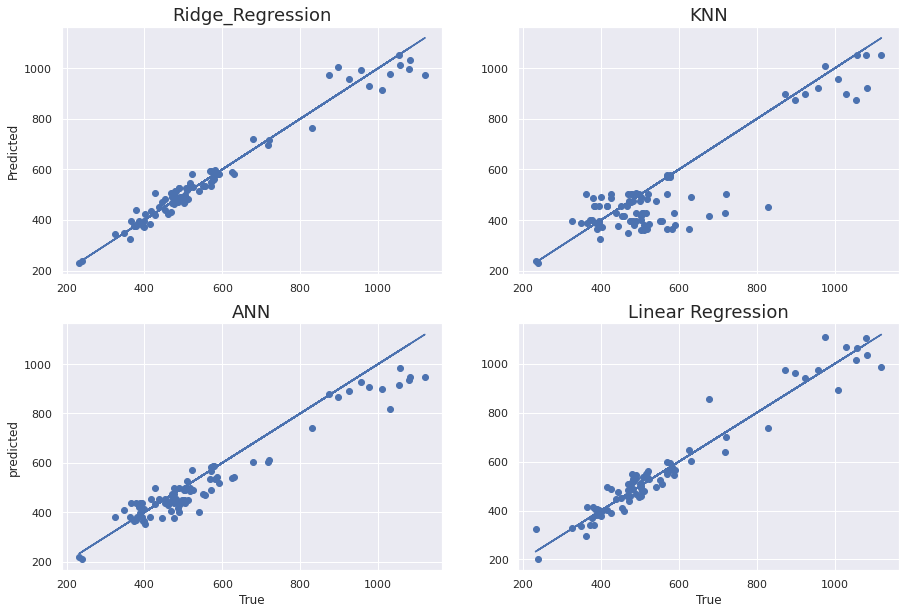

In [ ]:
plt.subplot(2,2,1)
plt.scatter(y_test,rig_pred)
plt.plot(y_test,y_test)
plt.title('Ridge_Regression',fontdict={'fontsize': 18})
plt.ylabel('Predicted')
plt.subplot(2,2,2)
plt.scatter(y_test,knn_pred)
plt.plot(y_test,y_test)
plt.title('KNN',fontdict={'fontsize': 18})
plt.subplot(2,2,3)
plt.scatter(y_test,ann_pred)
plt.plot(y_test,y_test)
plt.title('ANN',fontdict={'fontsize': 18})
plt.ylabel('predicted')
plt.xlabel('True')
plt.subplot(2,2,4)
plt.scatter(y_test,linreg_pred)
plt.plot(y_test,y_test)
plt.title('Linear Regression',fontdict={'fontsize': 18})
plt.xlabel('True')